# Assignment 01 - Mongo
*DBMS for Analytics*

**Due: Tuesday, February 10th, at midnight**

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate
  - Sample submission can be found on blackboard
  - **Not following these standards may result in lost points**

---
## Assignment Description
For this assignment we are going to use our Mongo database of Elon Musk tweets to identify whether Elon is more/less active on twitter during the weeks leading up to a major event.

To accomplish this, we will need to implement the following:
 1. Create a method to pull tweets that occured within a set timerange from a given date
 2. Create a method to randomly pull ranges of tweets (when blacking out certain ranges)
 3. Pull data from each respective approach to create event_tweets and non_event_tweet datasets
 4. Use a variety of analysis tools to determine the relationship between the two datasets

In [1]:
import numpy as np
from datetime import datetime, timedelta

from pymongo import MongoClient

client = MongoClient(host='18.219.151.47', #host is the hostname for the database
                     port=27017, #port is the port number that mongo is running on
                     username='student', #username for the db
                     password='emse6992pass', #password for the db
                     authSource='emse6992') #Since our user only exists for the emse6992 db, we need to specify this

db = client.emse6992
stats_coll = db.twitter_statuses

## Task 1
Write a function, ***get_tweets_daterange(screen_name, date, days_before, days_after)***, that takes a user's **screen_name** and will pull all tweets that occur *x* **days_before** and *y* **days_after** the provided **date** from the ***twitter_statuses*** collection for the given user.

Example:
`get_tweets_daterange('elonmusk', "2020-10-28", 14, 14)` would get all tweets made by *elonmusk* between 2020-10-14 - 2020-11-11 from the ***twitter_statuses*** collection, which should return 33 tweets.

In [2]:
def get_tweets_daterange(screen_name, date, days_before, days_after):
    """This function returns a list of tweets that fall inbetween date-days_before
    and date + days_after
    
    Args:
        screen_name (str): screen name of twitter user
        date (str): Date in the 'YYYY-MM-DD' format
        days_before (int): number of days prior to `date` to consider
        days_after (int): number of days after `date` to consider
        
    Returns:
        list: A list of all the tweets that meet the conditions
    """
    
    # Your code
    date_input = datetime.strptime(date, '%Y-%m-%d')
    date_start = date_input - timedelta(days=days_before)
    date_end = date_input + timedelta(days=days_after)

    doc_date = stats_coll.find({
        "$and": [
            {'user.screen_name': screen_name},
            {"created_at": {"$gte": date_start}},
            {"created_at": {"$lte": date_end}}
        ]
    })
    
    return doc_date

In [3]:
fi = get_tweets_daterange('elonmusk', "2020-10-28", 14, 14)
fi.count()

<ipython-input-3-9ddbe4438f08>:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  fi.count()


33

## Task 2
Write a function, ***get_random_date(min_date, max_date)***, that will generate a random date that falls within **min_date** and **max_date**.

Ensure the output of this function conforms to the _"YYYY-MM-DD"_ format used for the **get_tweets_daterange()**.

In [4]:
import random

In [5]:
# Space work
random.seed(10) # To provide consistent randomness

def get_random_date(min_date, max_date):
    """This function returns a random date inbetween min_date and max_date
    
    Args:
        min_date (str): Earliset date to consider - in the 'YYYY-MM-DD' format
        max_date (str): Latest date to consider - in the 'YYYY-MM-DD' format
        
    Returns:
        str: Random date - in the 'YYYY-MM-DD' format
    """
    
    # Your code
    start_date = datetime.strptime(min_date, '%Y-%m-%d')
    end_date = datetime.strptime(max_date, '%Y-%m-%d')

    num_dates = (end_date - start_date).days
    
    random_number = random.randrange(num_dates)
    random_date = start_date + timedelta(days=random_number)
    
    date_str = random_date.strftime("%Y-%m-%d")
    
    return date_str

In [6]:
b = get_random_date("2020-10-28", "2020-12-28")
b

'2020-12-03'

## Task 3
Using the two functions from task 1 & 2, create two datasets using `days_before = 14`, `dayse_after = 7` and `screen_name = 'elonmusk'`.
 - `major_events_dataset` - a collection of **get_tweets_daterange()** for the provided **major_events**
 - `random_events_dataset` - a collection of **get_tweets_daterange()** for at least 10 randomly generated dats
   - Use `min_date = "2020-01-01"` and `max_date = "2021-01-01"` for all calls to **get_random_date()**
   
Each dataset should be a python list where each element in the list is a result from **get_tweets_daterange()**

Example:
```python
major_events_dataset = [
    get_tweets_daterange(...,"2020-10-28",...),
    get_tweets_daterange(...,"2020-05-30",...),
    ....
]
```

In [7]:
major_events = ["2020-10-28", "2020-05-30", "2021-01-07"]
major_events_dataset=[]
random_events_dataset=[]

for i in major_events:
    major_events_dataset += get_tweets_daterange('elonmusk', i, 14, 7)

list_date = []
for i in range(10):
    list_date.append(get_random_date("2020-01-01", "2021-01-01"))

for i in list_date:
    random_events_dataset += get_tweets_daterange('elonmusk', i, 14, 7)

In [8]:
list_date

['2020-10-22',
 '2020-01-08',
 '2020-04-15',
 '2020-08-24',
 '2020-09-08',
 '2020-05-22',
 '2020-11-30',
 '2020-03-23',
 '2020-01-18',
 '2020-09-23']

## Task 4
From each dataset, create a histogram of the average tweets/week for each daterange.

This means the histogram for the major_events_dataset would only comprise of 3 values:
 - The avg. tweets/week for 2020-10-28, 2020-05-30, and 20201-01-07.
 
For the major events you should get `[5.666666666666667, 14.333333333333334, 7.666666666666667]`

_Note: For this you are welcome to use matplotlib, seaborn, or any other python plotting package._

In [9]:
avg_tweet_final = []
for i in major_events:
    avg_tweet_num = get_tweets_daterange('elonmusk', i, 14, 7)
    avg_tweet_final += [avg_tweet_num.count()/3]

avg_tweet_final

<ipython-input-9-af041dd35f86>:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  avg_tweet_final += [avg_tweet_num.count()/3]


[5.666666666666667, 14.333333333333334, 7.666666666666667]

In [10]:
avg_tweet_final_2 = []
for i in list_date:
    avg_tweet_num_2 = get_tweets_daterange('elonmusk', i, 14, 7)
    avg_tweet_final_2 += [avg_tweet_num_2.count()/3]

avg_tweet_final_2

<ipython-input-10-7e82e139db28>:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  avg_tweet_final_2 += [avg_tweet_num_2.count()/3]


[6.0,
 0.0,
 9.333333333333334,
 13.666666666666666,
 11.333333333333334,
 16.666666666666668,
 9.333333333333334,
 11.0,
 0.0,
 10.333333333333334]

<ipython-input-11-2072104b1784>:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  avg_tweet_final += [avg_tweet_num.count()/3]
<ipython-input-11-2072104b1784>:12: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  avg_tweet_final_2 += [avg_tweet_num_2.count()/3]


<AxesSubplot:>

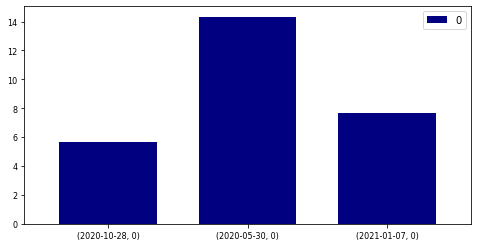

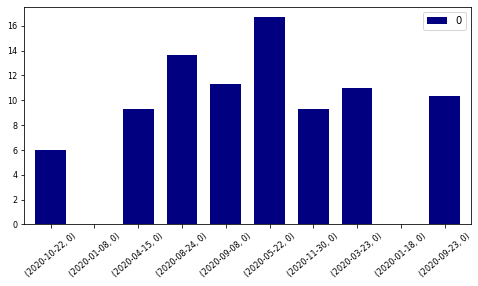

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
avg_tweet_final = []
avg_tweet_final_2 = []

for i in major_events:
    avg_tweet_num = get_tweets_daterange('elonmusk', i, 14, 7)
    avg_tweet_final += [avg_tweet_num.count()/3]

for i in list_date:
    avg_tweet_num_2 = get_tweets_daterange('elonmusk', i, 14, 7)
    avg_tweet_final_2 += [avg_tweet_num_2.count()/3]

data_major = [major_events, avg_tweet_final]
column_names_m = data_major.pop(0)
df_major_event = pd.DataFrame(data_major, columns=column_names_m)
df_lists_major = df_major_event.unstack().apply(pd.Series)
df_lists_major.plot.bar(rot=0, cmap=plt.cm.jet, fontsize=8, width=0.7, figsize=(8,4))

data_random = [list_date, avg_tweet_final_2]
column_names_r = data_random.pop(0)
df_random_event = pd.DataFrame(data_random, columns=column_names_r)
df_lists_random = df_random_event.unstack().apply(pd.Series)
df_lists_random.plot.bar(rot=40, cmap=plt.cm.jet, fontsize=8, width=0.7, figsize=(8,4))

# Task 5
Repeat the steps for Task 4, but this time plot the data based on average characters/week for each daterange.

For the major events you should get `[435.0, 1259.0, 575.6666666666666]`

In [12]:
def count_chars(txt):
    result = 0
    for char in txt:
        result += 1
    return result

In [13]:
avg_tweet_char_num = []

for i in major_events:
    avg_tweet_char = []
    avg_tweet_char += get_tweets_daterange('elonmusk', i, 14, 7)
    
    num_char = 0
    for doc in range(len(avg_tweet_char)):
        ab = count_chars(avg_tweet_char[doc]['text'])
        num_char += ab 

    avg_tweet_char_num += [num_char/3]

avg_tweet_char_num

[435.0, 1259.0, 575.6666666666666]

In [14]:
avg_tweet_char_num_ran = []

for i in list_date:
    avg_tweet_char_ran = []
    avg_tweet_char_ran += get_tweets_daterange('elonmusk', i, 14, 7)
    
    num_char_ran = 0
    for doc in range(len(avg_tweet_char_ran)):
        ab_ran = count_chars(avg_tweet_char_ran[doc]['text'])
        num_char_ran += ab_ran 

    avg_tweet_char_num_ran += [num_char_ran/3]

avg_tweet_char_num_ran

[608.0,
 0.0,
 736.0,
 1007.0,
 950.3333333333334,
 1489.0,
 642.3333333333334,
 1045.6666666666667,
 0.0,
 970.0]

<AxesSubplot:>

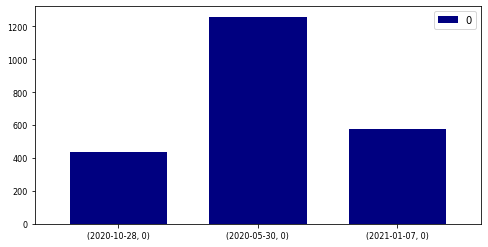

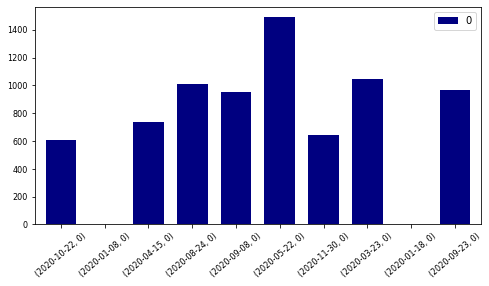

In [15]:
data_major_char = [major_events, avg_tweet_char_num]
column_names_m_char = data_major_char.pop(0)
df_major_event_char = pd.DataFrame(data_major_char, columns=column_names_m_char)
df_lists_major_char = df_major_event_char.unstack().apply(pd.Series)
df_lists_major_char.plot.bar(rot=0, cmap=plt.cm.jet, fontsize=8, width=0.7, figsize=(8,4))

data_random_char = [list_date, avg_tweet_char_num_ran]
column_names_r_char = data_random_char.pop(0)
df_random_event_char = pd.DataFrame(data_random_char, columns=column_names_r_char)
df_lists_random_char = df_random_event_char.unstack().apply(pd.Series)
df_lists_random_char.plot.bar(rot=40, cmap=plt.cm.jet, fontsize=8, width=0.7, figsize=(8,4))

## Task 6
Answer the following questions in the cell below using markdown.
 1. From the data, do you believe Elon was more/less active during major events? Please support your position using evidence from the previous tasks.
 2. What could we do to improve this experiment?
   - Your response could talk about data collection/aggregation, method of analysis, etc.

Your response:
Base on the comparison with the ten random daterange's average tweet counts, Elon Musk's tweeting patterns do not change much. Since the major event dates have the count of (4, 14, 8) is in the range of (0 - 17), there is no clear sign of changing in his behavior.  

From the data both on the average tweets count and range_date count, it is hard to dertermine if he is more active or not during the major events. Since only using the data from the 10 random datarange is not sufficient to support any conclusion, we will need to have more data of the year to discover if he tweets more on major events. For example, we can calculate the average number of tweets' count of one week instead of three weeks. Then we can compare the figures to see if the average tweet count on the major event weeks have a much bigger numbers than other normal weeks. Similarly, we can also collect the tweet count on daily bases from a year range to discover Elon Musk's tweeting pattern. 